# Checking Credible-or-not-Credible-clients

In [1]:
#IMPORTS
import numpy as np
import pandas as pd 
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


In [2]:
#Importing data
test_df = pd.read_csv("test.csv")
final_testfile=pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Pre-processing Data & Visualizing


In [3]:
train_df.columns = [x.lower() for x in train_df.columns]
test_df.columns = [x.lower() for x in test_df.columns]

train_df = train_df.rename(index=str, columns={"pay_0": "pay_1"})
test_df = test_df.rename(index=str, columns={"pay_0": "pay_1"})
#df = df.drop('id', axis=1)

#Drop Unnamed
train_df = train_df.drop('unnamed: 0', 1)
train_df = train_df.drop('id', 1)

test_df = test_df.drop('unnamed: 0', 1)
test_df = test_df.drop('id', 1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


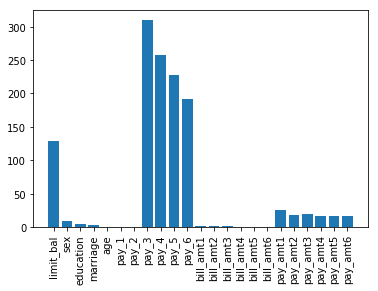

In [4]:
# Perform feature selection

predictors = ['limit_bal', 'sex','education', 'marriage', 'age',
 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3','bill_amt4',
 'bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3',
 'pay_amt4','pay_amt5','pay_amt6',]


selector = SelectKBest(f_classif, k=5)
selector.fit(train_df[predictors], train_df['default payment next month'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


# Splitting training data

In [5]:
train_df0 = train_df[["limit_bal",'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',
            'bill_amt1','bill_amt2','bill_amt3',
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',"default payment next month"]]


In [6]:
#Reducing and preparing features
X_data0 =train_df0[["limit_bal",'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',
            'bill_amt1','bill_amt2','bill_amt3',
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
y0 =train_df[["default payment next month"]]



In [7]:
X_train0,X_test0,Y_train0,Y_test0=train_test_split(X_data0,y0,test_size=0.33,random_state=30)

# Concatenating data to check Imbalance or not 

In [8]:
checkdf = pd.concat([X_train0, Y_train0], axis=1)
test_checkdf= pd.concat([X_test0, Y_test0], axis=1)

Class 0: 12645
Class 1: 3548
Proportion: 3.56 : 1


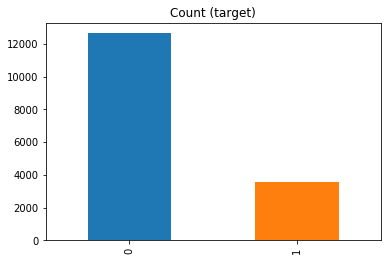

In [9]:
#Checking Imbalance data or not.
target_count = checkdf['default payment next month'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
# Class count
count_class_0, count_class_1 = checkdf['default payment next month'].value_counts()

# Divide by class
df_class_0 = train_df0[train_df0['default payment next month'] == 0]
df_class_1 = train_df0[train_df0['default payment next month'] == 1]

In [11]:
# Class count
testcount_class_0, testcount_class_1 = test_checkdf['default payment next month'].value_counts()

# Divide by class
testdf_class_0 = train_df0[train_df0['default payment next month'] == 0]
testdf_class_1 = train_df0[train_df0['default payment next month'] == 1]

# Oversampling train data

Random over-sampling:
0    12645
1     3548
Name: default payment next month, dtype: int64


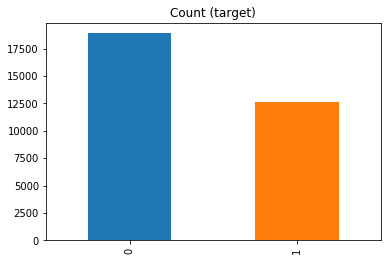

In [12]:
#Over-Sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


print('Random over-sampling:')
print(checkdf['default payment next month'].value_counts())

df_test_over['default payment next month'].value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
0    6245
1    1731
Name: default payment next month, dtype: int64


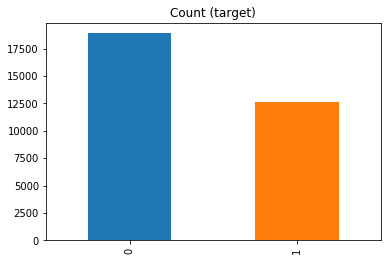

In [13]:
#Over-Sampling
testdf_class_1_over = testdf_class_1.sample(count_class_0, replace=True)
testdf_test_over = pd.concat([testdf_class_0, testdf_class_1_over], axis=0)


print('Random over-sampling:')
print(test_checkdf['default payment next month'].value_counts())

testdf_test_over['default payment next month'].value_counts().plot(kind='bar', title='Count (target)');

# Selecting Features 

In [14]:
X_data1 =checkdf[["limit_bal",'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',
            'bill_amt1','bill_amt2','bill_amt3',
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
y1 =checkdf[["default payment next month"]]

test_df1=test_df[["limit_bal",'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',
            'bill_amt1','bill_amt2','bill_amt3',
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]

In [15]:
testX_data1 =test_checkdf[["limit_bal",'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6',
            'bill_amt1','bill_amt2','bill_amt3',
            'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
testy1 =test_checkdf[["default payment next month"]]

# Normalizing data 

In [16]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_data1)
testdata= scaler.fit_transform(test_df1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Applying different Models

In [17]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=15325 )
random_forest.fit(X_normalized, y1.values.ravel())

Y_pred = random_forest.predict(testX_data1)
Y_predrf= random_forest.predict(testdata)

f1_random_forest = round(f1_score(testy1, Y_pred, average='micro') * 100, 2)
print(round(f1_random_forest,2,), "%")


80.77 %


In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_normalized, y1.values.ravel())

Y_pred = knn.predict(testX_data1)

f1_knn = round(f1_score(testy1, Y_pred, average='micro') * 100, 2)
print(round(f1_knn,2,), "%")

78.3 %


In [19]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_normalized, y1.values.ravel())

Y_pred = gaussian.predict(testX_data1)

f1_gaussian = round(f1_score(testy1, Y_pred, average='micro') * 100, 2)
print(round(f1_gaussian,2,), "%")

78.28 %


In [30]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_normalized, y1.values.ravel())

Y_pred = decision_tree.predict(testX_data1)

f1_dt = round(f1_score(testy1, Y_pred, average='micro') * 100, 2)
print(round(f1_dt,2,), "%")

28.65 %


In [21]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_normalized, y1.values.ravel())

Y_pred = linear_svc.predict(testX_data1)

f1_linear_svc = round(f1_score(testy1, Y_pred, average='micro') * 100, 2)
print(round(f1_linear_svc,2,), "%")

78.0 %


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'F1-Score': [f1_linear_svc, f1_knn, 
              f1_random_forest, f1_gaussian,
              f1_dt]})
result_df = results.sort_values(by='F1-Score', ascending=False)
result_df = result_df.set_index('F1-Score')
result_df.head()

,Model
F1-Score,
80.77,Random Forest
78.30,KNN
78.28,Naive Bayes
78.00,Support Vector Machines
28.02,Decision Tree


# Preparing Final Test File 

In [23]:
NY_pred=pd.DataFrame(Y_predrf)


In [24]:
NY_pred=pd.DataFrame(Y_predrf)

#Predicting labels by Random Forest
Final_testfile = final_testfile

Final_testfile = Final_testfile.set_index(NY_pred.index)
Final_testfile = pd.concat([Final_testfile, NY_pred], axis=1)
Final_testfile.rename(columns={0:'Prediction'},inplace=True)
Final_testfile = Final_testfile.drop('Unnamed: 0', 1)


In [25]:
#Save as final_test.csv
Final_testfile.to_csv('final_test.csv', encoding='utf-8', index=False)
Final_testfile

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction
0,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
1,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,12,260000,2,1,2,51,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
3,29,50000,2,3,1,47,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
4,32,50000,1,2,2,33,2,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,0
5,35,500000,1,1,1,58,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
6,36,160000,1,1,2,30,-1,-1,-2,-2,...,-923,-1488,-1884,131,396,396,565,792,0,0
7,39,50000,1,1,2,25,1,-1,-1,-2,...,0,0,0,780,0,0,0,0,0,0
8,45,40000,2,1,2,30,0,0,0,2,...,25209,26636,29197,3000,5000,0,2000,3000,0,0
9,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
